In [1]:
import librosa
import librosa.display

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
import os

In [1]:
def audio_to_melspectrogram(audio_path, fixed_length=168):
    """Extract Mel Spectrogram with a consistent shape (168, 168)."""
    try:
        audio, sr = librosa.load(audio_path, sr=22050, mono=True)
        n_fft = min(2048, len(audio))  # Ensure valid n_fft

        # **Extract Log-Mel Spectrogram**
        mel_spectrogram = librosa.feature.melspectrogram(
            y=audio, sr=sr, n_fft=n_fft, n_mels=168, fmax=8000
        )
        mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # **Fix shape to (168, 168)**
        if mel_db.shape[1] > fixed_length:
            mel_db = mel_db[:, :fixed_length]  # Trim
        else:
            mel_db = np.pad(mel_db, ((0, 0), (0, fixed_length - mel_db.shape[1])), mode='constant')  # Pad

        return mel_db  # Return spectrogram only

    except Exception as e:
        print(f"❌ Error processing {audio_path}: {e}")
        return None  # Handle errors gracefully

In [2]:
mel_spec = audio_to_melspectrogram(r"F:\camera\gun shot\demo.wav")

❌ Error processing F:\camera\gun shot\demo.wav: name 'librosa' is not defined


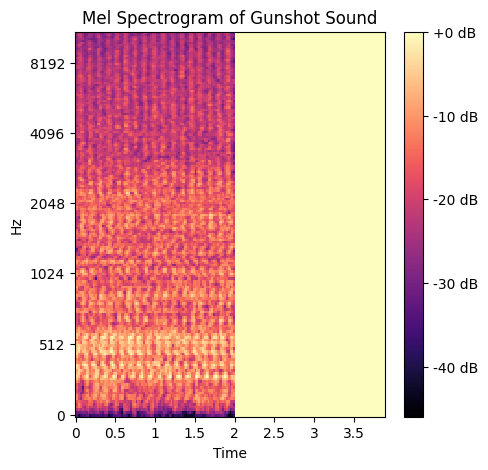

In [15]:
plt.figure(figsize=(5, 5))
librosa.display.specshow(mel_spec, x_axis="time", y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram of Gunshot Sound")
plt.show()

# Save Spectrogram Images

In [63]:
import cv2

In [64]:
def save_spectrogram(mel_spec, save_path):
    plt.figure(figsize=(5,5))
    librosa.display.specshow(mel_spec, x_axis='time', y_axis="mel")
    plt.axis('off') # remove axis
    plt.savefig(save_path, bbox_inches="tight", pad_inches=0)
    plt.close()

In [65]:
mel_spec, sr= audio_to_melspectrogram(r"F:\camera\gun shot\demo.wav")

In [66]:
mel_spec

array([[-29.775763, -33.408222, -41.91137 , ...,   0.      ,   0.      ,
          0.      ],
       [-28.363037, -31.154583, -31.388748, ...,   0.      ,   0.      ,
          0.      ],
       [-28.569305, -23.161823, -19.79448 , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [-35.4516  , -27.989504, -23.251839, ...,   0.      ,   0.      ,
          0.      ],
       [-32.375103, -26.247078, -21.184864, ...,   0.      ,   0.      ,
          0.      ],
       [-29.925602, -26.799662, -22.072643, ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [67]:
sr

22050

In [68]:
save_spectrogram(mel_spec, '1.png')

# Save All Images

# Train Gunshot 

In [73]:
audio_path = r"F:\camera\gun shot\raw_dataset\train\gunshot"

In [74]:
audio_path

'F:\\camera\\gun shot\\raw_dataset\\train\\gunshot'

In [75]:
len(os.listdir(audio_path))

2125

In [76]:
!mkdir dataset\train\gunshot dataset\train\non_gunshot dataset\validation\gunshot dataset\validation\non_gunshot


A subdirectory or file dataset\train\gunshot already exists.
Error occurred while processing: dataset\train\gunshot.
A subdirectory or file dataset\train\non_gunshot already exists.
Error occurred while processing: dataset\train\non_gunshot.
A subdirectory or file dataset\validation\gunshot already exists.
Error occurred while processing: dataset\validation\gunshot.
A subdirectory or file dataset\validation\non_gunshot already exists.
Error occurred while processing: dataset\validation\non_gunshot.


### Conversion on Gunshot Training Audios

In [77]:
i = 0

In [78]:
for audio in os.listdir(audio_path):
    
    mel_spec, sr = audio_to_melspectrogram(audio_path=fr"{audio_path}\{audio}")
    

    save_spectrogram(mel_spec, fr"F:\camera\gun shot\dataset\train\gunshot\{audio}.png")

    print(f"[{i}th Pass is Done Out of {len(os.listdir(audio_path))}]")
    
    i += 1

print("All Spectrogram Images are Saved")

[0th Pass is Done Out of 2125]
[1th Pass is Done Out of 2125]
[2th Pass is Done Out of 2125]
[3th Pass is Done Out of 2125]
[4th Pass is Done Out of 2125]
[5th Pass is Done Out of 2125]
[6th Pass is Done Out of 2125]
[7th Pass is Done Out of 2125]
[8th Pass is Done Out of 2125]
[9th Pass is Done Out of 2125]
[10th Pass is Done Out of 2125]
[11th Pass is Done Out of 2125]
[12th Pass is Done Out of 2125]
[13th Pass is Done Out of 2125]
[14th Pass is Done Out of 2125]
[15th Pass is Done Out of 2125]
[16th Pass is Done Out of 2125]
[17th Pass is Done Out of 2125]
[18th Pass is Done Out of 2125]
[19th Pass is Done Out of 2125]
[20th Pass is Done Out of 2125]
[21th Pass is Done Out of 2125]
[22th Pass is Done Out of 2125]
[23th Pass is Done Out of 2125]
[24th Pass is Done Out of 2125]
[25th Pass is Done Out of 2125]
[26th Pass is Done Out of 2125]
[27th Pass is Done Out of 2125]
[28th Pass is Done Out of 2125]
[29th Pass is Done Out of 2125]
[30th Pass is Done Out of 2125]
[31th Pass is Done

C:\Users\write\AppData\Local\Temp\ipykernel_11556\3123050599.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=22050, mono=True)
F:\camera\.camera_venv\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


TypeError: cannot unpack non-iterable NoneType object

# Train Non-Gunshot

In [79]:
audio_path = r"F:\camera\gun shot\raw_dataset\train\non gunshot"

In [80]:
len(os.listdir(audio_path))

2094

In [81]:
i = 0

In [82]:
for audio in os.listdir(audio_path):
    mel_spec, sr = audio_to_melspectrogram(fr"{audio_path}\{audio}")

    save_spectrogram(mel_spec, fr"F:\camera\gun shot\dataset\train\non_gunshot\{audio}.png")

    print(f"[{i}th Pass is Done Out of {len(os.listdir(audio_path))}]")
    i += 1

[0th Pass is Done Out of 2094]
[1th Pass is Done Out of 2094]
[2th Pass is Done Out of 2094]
[3th Pass is Done Out of 2094]
[4th Pass is Done Out of 2094]
[5th Pass is Done Out of 2094]
[6th Pass is Done Out of 2094]
[7th Pass is Done Out of 2094]
[8th Pass is Done Out of 2094]
[9th Pass is Done Out of 2094]
[10th Pass is Done Out of 2094]
[11th Pass is Done Out of 2094]
[12th Pass is Done Out of 2094]
[13th Pass is Done Out of 2094]
[14th Pass is Done Out of 2094]
[15th Pass is Done Out of 2094]
[16th Pass is Done Out of 2094]
[17th Pass is Done Out of 2094]
[18th Pass is Done Out of 2094]
[19th Pass is Done Out of 2094]
[20th Pass is Done Out of 2094]
[21th Pass is Done Out of 2094]
[22th Pass is Done Out of 2094]
[23th Pass is Done Out of 2094]
[24th Pass is Done Out of 2094]
[25th Pass is Done Out of 2094]
[26th Pass is Done Out of 2094]
[27th Pass is Done Out of 2094]
[28th Pass is Done Out of 2094]
[29th Pass is Done Out of 2094]
[30th Pass is Done Out of 2094]
[31th Pass is Done

# Valid Gunshot

In [85]:
audio_path = r"F:\camera\gun shot\raw_dataset\validation\gunshot"

In [86]:
len(os.listdir(audio_path))

400

In [87]:
i = 0

In [88]:
for audio in os.listdir(audio_path):
    mel_spec, sr = audio_to_melspectrogram(fr"{audio_path}\{audio}")

    save_spectrogram(mel_spec, fr"F:\camera\gun shot\dataset\validation\gunshot\{audio}.png")

    print(f"[{i}th Pass is Done Out of {len(os.listdir(audio_path))}]")
    i += 1

[0th Pass is Done Out of 400]
[1th Pass is Done Out of 400]
[2th Pass is Done Out of 400]
[3th Pass is Done Out of 400]
[4th Pass is Done Out of 400]
[5th Pass is Done Out of 400]
[6th Pass is Done Out of 400]
[7th Pass is Done Out of 400]
[8th Pass is Done Out of 400]
[9th Pass is Done Out of 400]
[10th Pass is Done Out of 400]
[11th Pass is Done Out of 400]
[12th Pass is Done Out of 400]
[13th Pass is Done Out of 400]
[14th Pass is Done Out of 400]
[15th Pass is Done Out of 400]
[16th Pass is Done Out of 400]
[17th Pass is Done Out of 400]
[18th Pass is Done Out of 400]
[19th Pass is Done Out of 400]
[20th Pass is Done Out of 400]
[21th Pass is Done Out of 400]
[22th Pass is Done Out of 400]
[23th Pass is Done Out of 400]
[24th Pass is Done Out of 400]
[25th Pass is Done Out of 400]
[26th Pass is Done Out of 400]
[27th Pass is Done Out of 400]
[28th Pass is Done Out of 400]
[29th Pass is Done Out of 400]
[30th Pass is Done Out of 400]
[31th Pass is Done Out of 400]
[32th Pass is Done

# Validation Non-Gunshot

In [93]:
audio_path = r"F:\camera\gun shot\raw_dataset\validation\non_gunshot"

In [94]:
len(os.listdir(audio_path))

336

In [95]:
i = 0

In [96]:
for audio in os.listdir(audio_path):
    mel_spec, sr = audio_to_melspectrogram(fr"{audio_path}\{audio}")

    save_spectrogram(mel_spec, fr"F:\camera\gun shot\dataset\validation\non_gunshot\{audio}.png")

    print(f"[{i}th Pass is Done Out of {len(os.listdir(audio_path))}]")
    i += 1

[0th Pass is Done Out of 336]
[1th Pass is Done Out of 336]
[2th Pass is Done Out of 336]
[3th Pass is Done Out of 336]
[4th Pass is Done Out of 336]
[5th Pass is Done Out of 336]
[6th Pass is Done Out of 336]
[7th Pass is Done Out of 336]
[8th Pass is Done Out of 336]
[9th Pass is Done Out of 336]
[10th Pass is Done Out of 336]
[11th Pass is Done Out of 336]
[12th Pass is Done Out of 336]
[13th Pass is Done Out of 336]
[14th Pass is Done Out of 336]
[15th Pass is Done Out of 336]
[16th Pass is Done Out of 336]
[17th Pass is Done Out of 336]
[18th Pass is Done Out of 336]
[19th Pass is Done Out of 336]
[20th Pass is Done Out of 336]
[21th Pass is Done Out of 336]
[22th Pass is Done Out of 336]
[23th Pass is Done Out of 336]
[24th Pass is Done Out of 336]
[25th Pass is Done Out of 336]
[26th Pass is Done Out of 336]
[27th Pass is Done Out of 336]
[28th Pass is Done Out of 336]
[29th Pass is Done Out of 336]
[30th Pass is Done Out of 336]
[31th Pass is Done Out of 336]
[32th Pass is Done